In [3]:
# Import Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Insight:

Dataset contains 768 records and 9 columns

Target variable: Outcome (0 = Non-diabetic, 1 = Diabetic)

In [4]:
# Descriptive Statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Insight:

Mean, min, max, and standard deviation help understand data spread

Some features like Glucose, BloodPressure, Insulin, BMI have minimum value = 0

In medical context, 0 is not valid, indicating missing data

In [5]:
# Missing Values Analysis
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Insight:

No explicit NaN values

However, zero values act as missing values in:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

In [14]:
# Missing Values Treatment
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
5,5,116,74,23,30.5,25.6,0.201,30,0


### Insight:

Zero values replaced with median

Median is preferred because it is robust to outliers

This preserves the distribution of medical measurements

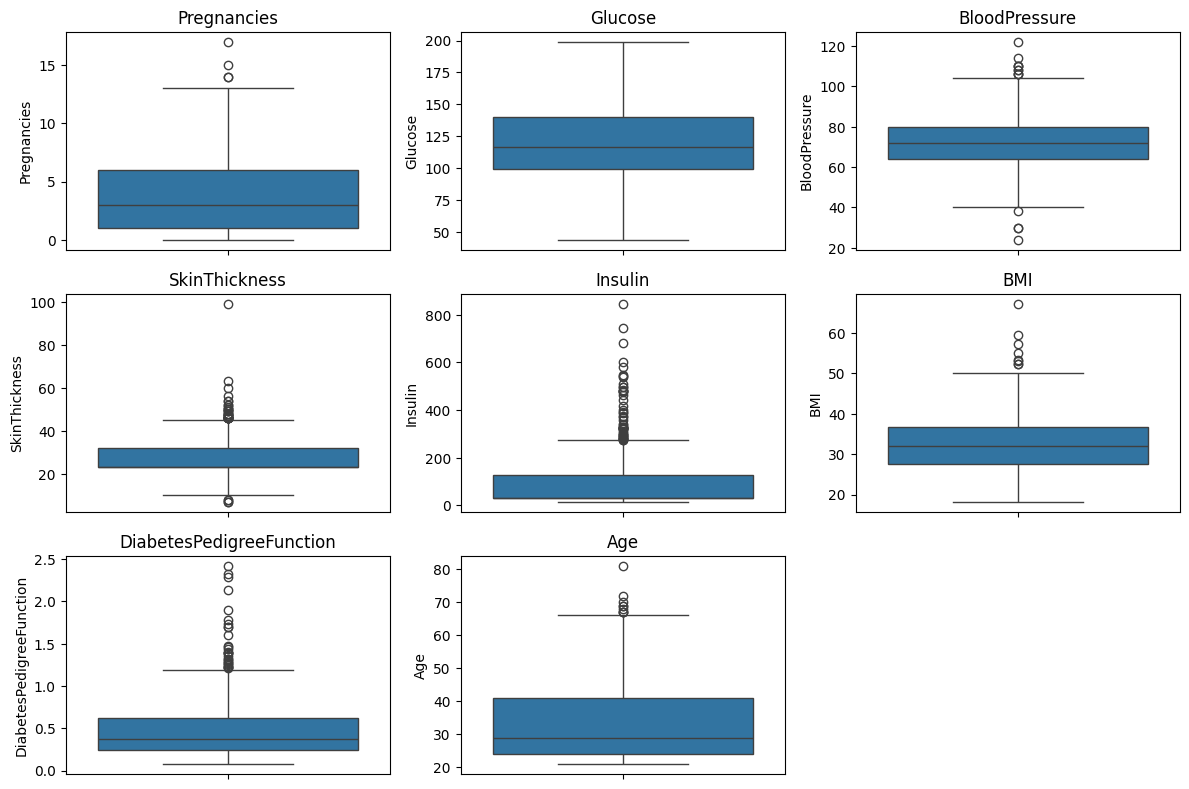

In [7]:
# Outlier Analysis
plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### Insight:

Outliers observed in:

Insulin

BMI

Age

Medical data naturally contains outliers (high sugar levels, obesity, etc.)

In [ ]:
# Outlier Treatment (IQR Method)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in df.columns[:-1]:
    df = remove_outliers_iqr(df, col)

### Insight:

IQR method removes extreme values

Helps improve model stability

Some data loss occurs but noise is reduced

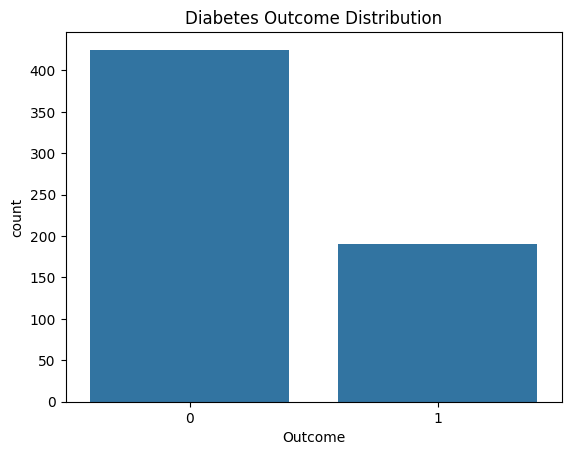

In [9]:
# Exploratory Data Analysis (EDA)
# Outcome Distribution
sns.countplot(x=df['Outcome'])
plt.title("Diabetes Outcome Distribution")
plt.show()


### Insight:

Slight class imbalance

More non-diabetic cases than diabetic cases

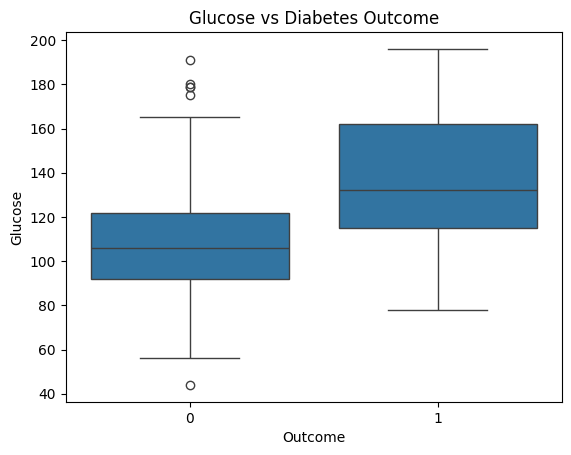

In [10]:
# Glucose vs Outcome
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose vs Diabetes Outcome")
plt.show()

### Insight:

Diabetic patients have significantly higher glucose levels

Glucose is a strong indicator of diabetes

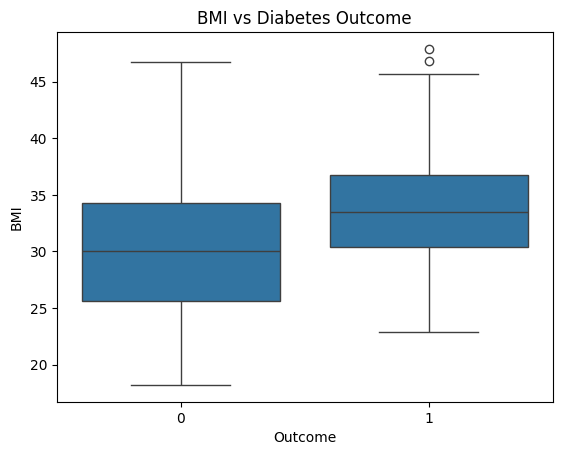

In [11]:
# BMI vs Outcome
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("BMI vs Diabetes Outcome")
plt.show()

### Insight:

Higher BMI is associated with diabetes

Obesity is a known risk factor

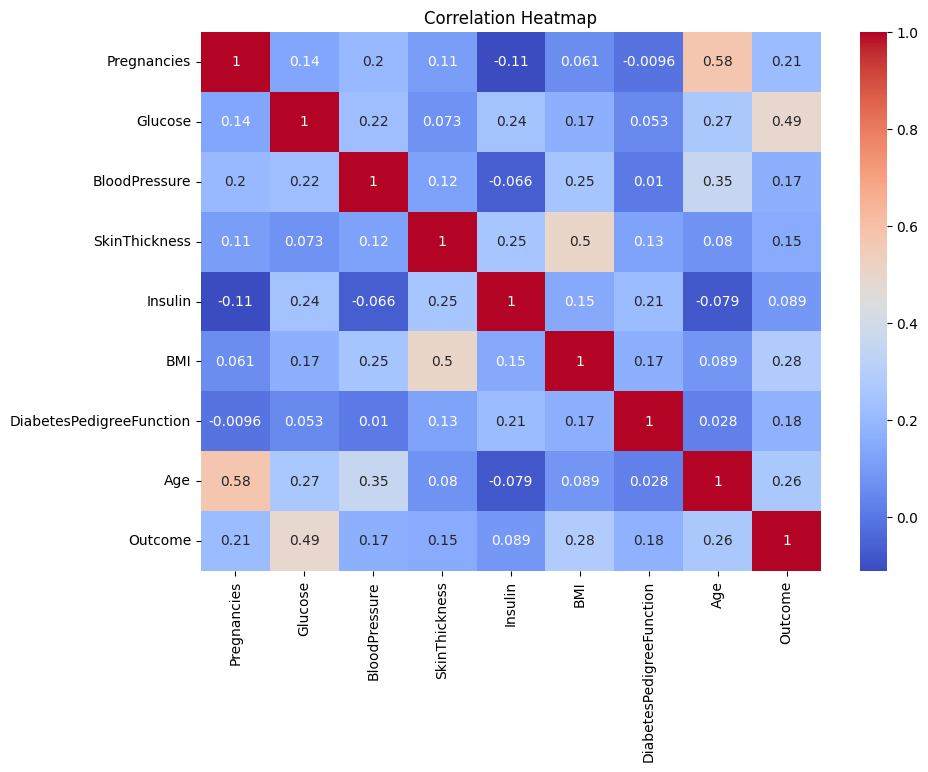

In [12]:
# Correlation Analysis
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Insight:

Glucose has the strongest positive correlation with Outcome

BMI and Age show moderate correlation

Insulin and SkinThickness have weak correlation

Helps in feature selection for predictive modeling

### Insights :
Blood pressure : Normal - <80 ,Elevated - 80 - 89 , Hypertension - >=90

Glucose :  Normal - <140 , Prediabetic - 140 - 99 , Diabetic - >=200

SkinThickness : Normal - 10-25 , Overfat - 25-35 , Obese - >35

Insulin :  Normal- 2-25 ,  Insulin Resistance - >25

BMI (Body Mass Index) : Underweight - <18.5 ,Normal - 18.5-22.9 , Overweight - 23-24.9 , Obese - >=25

DPF : Low -  <0.3 , Moderate - 0.3-0.6 , High - >0.6